# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas

import pandas as pd
import numpy as np

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
def transform_money(val):
    euros = val.replace('€', '')
    if 'M' in euros:
        euros = euros.replace('M', '')
        euros = float(euros)*1000000
    elif 'K' in euros:
        euros = euros.replace('K', '')
        euros = float(euros)*1000
    return float(euros)

In [6]:
# Your code here:


fifa['ValueNumeric'] =  fifa['Value'].apply(transform_money)
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500000.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000000.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [9]:
# Your code here:

import statsmodels.api as sm
from statsmodels.formula.api import ols

fifa = fifa.rename(columns={"Preferred Foot": "PreferredFoot"})

model = ols('ValueNumeric ~ C(PreferredFoot)*C(Position)', data=fifa).fit()
table = sm.stats.anova_lm(model, typ=2)
table


,sum_sq,df,F,PR(>F)
C(PreferredFoot),2.341622e+14,1.0,7.734728,5.422475e-03
C(Position),1.657002e+16,26.0,21.051242,2.211476e-97
C(PreferredFoot):C(Position),5.152828e+15,26.0,6.546369,5.153228e-23
Residual,5.477500e+17,18093.0,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
# Your conclusions here:

#All p-values are < 0,05, so there are differences between groups.

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [8]:
# Your code here:

model = ols('ValueNumeric ~ C(Nationality)', data=fifa).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(Nationality),3.281224e+16,163.0,6.762478,4.840477e-134
Residual,5.370951e+17,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
##Again,  p-value is < 0,05, so there are differences between groups.

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [11]:
# Your code here:

fifa.isnull().sum()

Name               0
Age                0
Nationality        0
Overall            0
Potential          0
Club             241
Value              0
PreferredFoot     48
Position          60
Weak Foot         48
Acceleration      48
SprintSpeed       48
Stamina           48
Strength          48
LongShots         48
Aggression        48
Interceptions     48
Positioning       48
Vision            48
Penalties         48
ValueNumeric       0
dtype: int64

In [13]:
fifa = fifa.dropna()

In [14]:
fifa.isnull().sum()

Name             0
Age              0
Nationality      0
Overall          0
Potential        0
Club             0
Value            0
PreferredFoot    0
Position         0
Weak Foot        0
Acceleration     0
SprintSpeed      0
Stamina          0
Strength         0
LongShots        0
Aggression       0
Interceptions    0
Positioning      0
Vision           0
Penalties        0
ValueNumeric     0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [18]:
# Your code here:


model = sm.OLS(Y,X_m)  

results = model.fit()
predictions = results.predict(X_m)
predictions

0        2.910808e+06
1        3.592900e+06
2        3.291519e+06
3        1.721817e+06
4        3.717189e+06
5        3.383337e+06
6        3.683769e+06
7        3.719687e+06
8        3.459219e+06
9        1.629999e+06
10       3.191258e+06
11       3.100988e+06
12       2.695300e+06
13       3.226226e+06
14       3.972661e+06
15       3.265592e+06
16       3.683769e+06
17       3.390830e+06
18       1.394509e+06
19       1.519747e+06
20       3.603490e+06
21       3.804012e+06
22       1.716822e+06
23       3.099440e+06
24       2.634404e+06
25       3.363355e+06
26       3.419255e+06
27       3.614430e+06
28       2.871443e+06
29       3.041042e+06
             ...     
18177    2.079099e+06
18178    7.982894e+05
18179    2.240255e+06
18180    1.327668e+06
18181    2.462307e+06
18182    2.189351e+06
18183    9.125871e+05
18184    2.418896e+06
18185    2.452316e+06
18186    1.822078e+06
18187    2.493230e+06
18188    1.252736e+06
18189    2.222771e+06
18190    2.510714e+06
18191    1

In [26]:
import statsmodels.api as sm

X_m = fifa[['Stamina', 'SprintSpeed']]
Y = fifa['ValueNumeric']

X = sm.add_constant(X_m)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Tue, 10 Sep 2019   Prob (F-statistic):          8.04e-193
Time:                        15:19:14   Log-Likelihood:            -3.0350e+05
No. Observations:               17918   AIC:                         6.070e+05
Df Residuals:                   17915   BIC:                         6.070e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.07e+06   1.97e+05    -15.600      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:

#R squared is very low, so this model does not explain much of the variation in the data.

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [27]:
# Your code here:

X_m = fifa['Potential']
Y = fifa['ValueNumeric']

X = sm.add_constant(X_m)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:32:59   Log-Likelihood:            -3.0027e+05
No. Observations:               17918   AIC:                         6.006e+05
Df Residuals:                   17916   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.544e+07      4e+05    -88.693      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:

#R squared is now 0.336, so this model does not explain much of the variation in the data again.

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

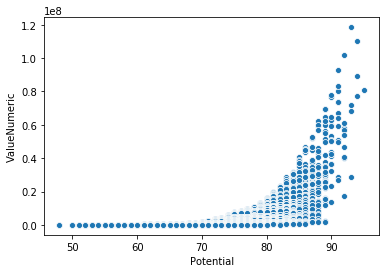

In [36]:
# Your code here:

import seaborn as sns

sns.scatterplot(data=fifa, x='Potential', y='ValueNumeric')

#The relationship is not linear, but more or less exponential